In [4]:
import pandas as pd
df = pd.read_csv('IMDB Dataset.csv', engine='python', on_bad_lines='skip')
print(df.head())


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [5]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r"<.*?>", "", text)  # remove HTML tags
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # remove punctuation
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return " ".join(words)

df['clean_review'] = df['review'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_review']).toarray()
y = df['sentiment'].map({'positive': 1, 'negative': 0})


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


In [8]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8852737085582113
[[2847  403]
 [ 341 2894]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      3250
           1       0.88      0.89      0.89      3235

    accuracy                           0.89      6485
   macro avg       0.89      0.89      0.89      6485
weighted avg       0.89      0.89      0.89      6485



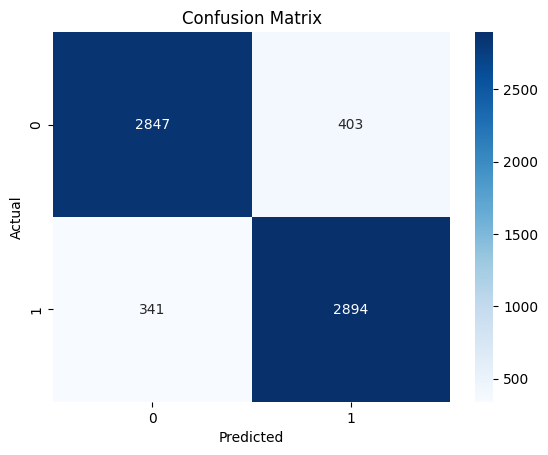

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [10]:
import pickle

# Save model and vectorizer
pickle.dump(model, open("sentiment_model.pkl", "wb"))
pickle.dump(tfidf, open("vectorizer.pkl", "wb"))


In [11]:
import pickle

# Load the saved model and vectorizer
model = pickle.load(open("sentiment_model.pkl", "rb"))
tfidf = pickle.load(open("vectorizer.pkl", "rb"))

# Sample input
new_review = ["The movie was thrilling and well-acted, I loved it!"]

# Transform the new review using the same vectorizer
new_review_transformed = tfidf.transform(new_review)

# Predict sentiment
prediction = model.predict(new_review_transformed)

# Show result
print("Predicted Sentiment:", "Positive" if prediction[0] == 1 else "Negative")


Predicted Sentiment: Positive
